In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h3>About the dataset</h3>

This dataset chronicles every MLS game from 1996 to 2016. It is part of a much larger set of historical soccer data pulled from https://github.com/jalapic/engsoccerdata/. 

In major league soccer the atmosphere of a stadium can change wildly depending on who is the home team. The average attendance can range from in the low thousands to a MLS record attendance of 72,243. In more recent times though the MLS average has been growing, with the average attendance in 2016 being 21,692, a 57% increase over the 13,756 average in 2000.

In my studies with this dataset, I want to look into how much a home field can change a game. 
<ul>
    <li>Does the home team win more often? How much?</li>
    <li>Are more goals scored at home than away?</li>
    <li>Which team has the most home field advantage?</li>
    <li>Do any teams perform better away than home?</li>
    <li>Are ties affected by home field advantage at all?</li>
    <li>What types of factors could be causing the advantage / disadvantage?</li>
</ul>

In [18]:
df = pd.read_csv('datasets/mls.csv')

# lets take a look at what info this dataset has
df.head()

,Date,Season,home,visitor,FT,hgoal,vgoal,hconf,vconf,totgoal,round,leg,hgoalaet,vgoalaet,hpen,vpen
0,1996-04-06,1996,San Jose Earthquakes,DC United,1-0,1,0,West,East,1,regular,NaN,NaN,NaN,NaN,NaN
1,1996-04-13,1996,LA Galaxy,New York Red Bulls,2-1,2,1,West,East,3,regular,NaN,NaN,NaN,NaN,NaN
2,1996-04-13,1996,Tampa Bay Mutiny,New England Revolution,3-2,3,2,East,East,5,regular,NaN,NaN,NaN,NaN,NaN
3,1996-04-13,1996,Columbus Crew,DC United,4-0,4,0,East,East,4,regular,NaN,NaN,NaN,NaN,NaN
4,1996-04-13,1996,Sporting Kansas City,Colorado Rapids,3-0,3,0,West,West,3,regular,NaN,NaN,NaN,NaN,NaN


total goals: 14197
average goals per match: 2.8422422422422424
total Home goals: 8325
total Away goals: 5874
average Home goals scored: 1.6666666666666667
average Away goals scored: 1.175975975975976


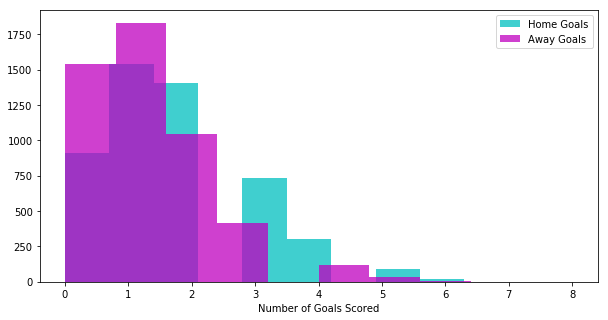

In [147]:
# what is the average score for each team?
print('total goals:', df.totgoal.sum())
print('average goals per match:', df.totgoal.mean())
print('total Home goals:', df.hgoal.sum())
print('total Away goals:', df.vgoal.sum())
print('average Home goals scored:', df.hgoal.mean())
print('average Away goals scored:', df.vgoal.mean())

# how do the goals distribute
plt.figure(figsize=(10, 5))
plt.hist(df['hgoal'], alpha=.75, label='Home Goals', color='c')
plt.hist(df['vgoal'], alpha=.75, label='Away Goals', color='m')
plt.xlabel('Number of Goals Scored')
plt.legend()
plt.show()

__As seen above, teams on average score more goals at home, albeit slightly.__ 

The more telling thing in the graph is that away teams are much more likely to not score at all and home teams are much more likely to score more than 1 goal. 

From here, it is clear that generally there is an advantage to the home team. With the average home goals being higher than the average away goals, you can come to the conclusion that generally the home team should score more goals than the away team. How this plays out in real life is of course a bit different, so we need to dig a bit deeper. From here, we should take a look into how many wins each team has at home vs how many wins each team has away.




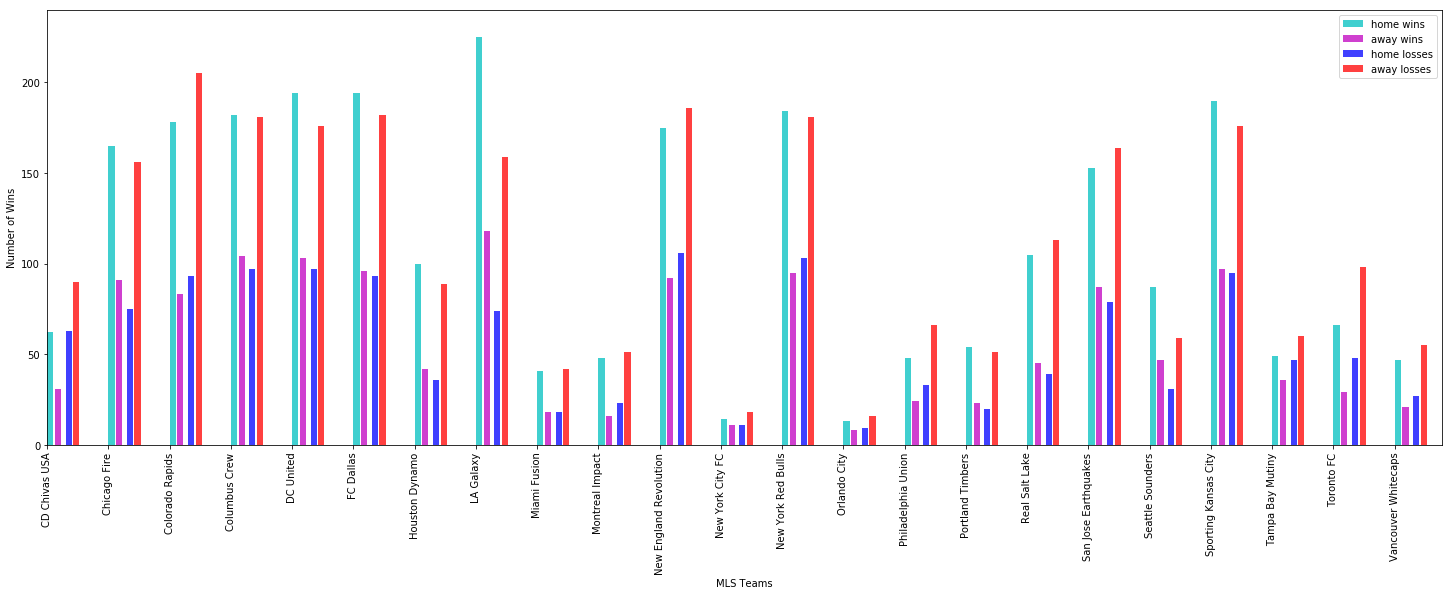

In [146]:
# organize wins & losses
home_wins = df.loc[df['hgoal'] > df['vgoal']]
away_wins = df.loc[df['vgoal'] > df['hgoal']]
ties = df.loc[df['vgoal'] == df['hgoal']]


#show wins
plt.figure(figsize=(25, 8))

home_wins.groupby('home').size().plot(kind='bar', 
                                      ylim=(0, 240), 
                                      color='c', 
                                      width=.1,
                                      label='home wins',
                                      position=0,
                                      alpha=.75
                                      )
away_wins.groupby('visitor').size().plot(kind='bar', 
                                         ylim=(0, 240), 
                                         color='m', 
                                         width=.1,
                                         label='away wins',
                                         position=-1.25,
                                         alpha=.75)
away_wins.groupby('home').size().plot(kind='bar', 
                                         ylim=(0, 240), 
                                         color='b', 
                                         width=.1,
                                         label='home losses',
                                         position=-3,
                                         alpha=.75)
home_wins.groupby('visitor').size().plot(kind='bar', 
                                         ylim=(0, 240), 
                                         color='r', 
                                         width=.1,
                                         label='away losses',
                                         position=-4.25,
                                         alpha=.75)
plt.xlabel('MLS Teams')
plt.ylabel('Number of Wins')
plt.legend()
plt.show()

Okay, not that we've seen wins and losses, are ties effected by home field advantage at all?

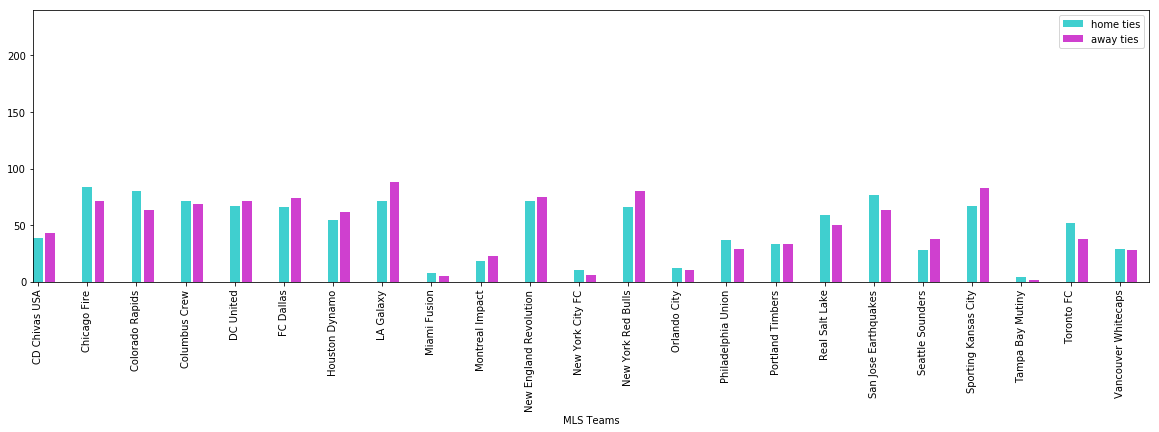

In [196]:
#check and see if ties seem to be effected by home / away
plt.figure(figsize=(20, 5))
ties.groupby('home').size().plot(kind='bar', 
                                         ylim=(0, 240), 
                                         color='c', 
                                         width=.2,
                                         label='home ties',
                                         alpha=.75)
ties.groupby('visitor').size().plot(kind='bar', 
                                         ylim=(0, 240), 
                                         color='m', 
                                         width=.2,
                                         label='away ties',
                                         position=-.75,
                                         alpha=.75)
plt.xlabel('MLS Teams')
plt.legend()
plt.show()

It doesn't seem like there is any immediate connection to ties and homefield advantage. If anything, you could say that the teams who win more at home tend to get slightly more away ties then home ties.


<h3>Home Wins vs Away Wins</h3>

Based on the above graph, you can see that that the home team obviously has an advantage and no team in MLS has performed better away than they have at home. Some teams have performed better away than others but because there is a large variance in the amount of games each team has had, it is hard to tell exactly how well each team has performed. The MLS has been consistently adding teams over the past 15 years and in 2002 dropped the Miami Fusion and Tampa Bay Mutiny from their roster.

To get a true sense of how well each team has actually perfomed, we need to bring each of these records down to the same level. To do that, we need calculate the percentage of wins a team gets both home and away.

In [182]:
# New data frame to hold wins, losses, and calculate ratios
win_ratio = pd.DataFrame(data=home_wins.groupby('home').size(), columns=['Home Wins'])
win_ratio['Away Wins'] = away_wins.groupby('visitor').size()
win_ratio['Home Losses'] = away_wins.groupby('home').size()
win_ratio['Away Losses'] = home_wins.groupby('visitor').size()
win_ratio['Home Ties'] = ties.groupby('home').size()
win_ratio['Away Ties'] = ties.groupby('visitor').size()
win_ratio['Home Win %'] = win_ratio['Home Wins']/(win_ratio['Home Wins']+win_ratio['Home Losses']+win_ratio['Home Ties'])
win_ratio['Away Win %'] = win_ratio['Away Wins']/(win_ratio['Away Wins']+win_ratio['Away Losses']+win_ratio['Away Ties'])
win_ratio['Total Win %'] = (win_ratio['Home Wins']+win_ratio['Away Wins'])/(win_ratio['Home Wins']+win_ratio['Home Losses']+win_ratio['Home Ties']+win_ratio['Away Wins']+win_ratio['Away Losses']+win_ratio['Away Ties'])
win_ratio.sort_values('Home Win %', ascending=False)

,Home Wins,Away Wins,Home Losses,Away Losses,Home Ties,Away Ties,Home Win %,Away Win %,Total Win %
home,,,,,,,,,
Miami Fusion,41,18,18,42,8,5,0.611940,0.276923,0.446970
LA Galaxy,225,118,74,159,71,88,0.608108,0.323288,0.466667
Seattle Sounders,87,47,31,59,28,38,0.595890,0.326389,0.462069
FC Dallas,194,96,93,182,66,74,0.549575,0.272727,0.411348
DC United,194,103,97,176,67,71,0.541899,0.294286,0.419492
Sporting Kansas City,190,97,95,176,67,83,0.539773,0.272472,0.405367
Montreal Impact,48,16,23,51,18,23,0.539326,0.177778,0.357542
Houston Dynamo,100,42,36,89,55,62,0.523560,0.217617,0.369792
New York Red Bulls,184,95,103,181,66,80,0.521246,0.266854,0.393512


In [179]:
print('Average Home win %:', win_ratio['Home Win %'].mean())
print('Average Away win %:', win_ratio['Away Win %'].mean())
print('Average win %:', win_ratio['Total Win %'].mean())

Average Home win %: 0.49969572855034017
Average Away win %: 0.256480612956059
Average win %: 0.37810406564860516


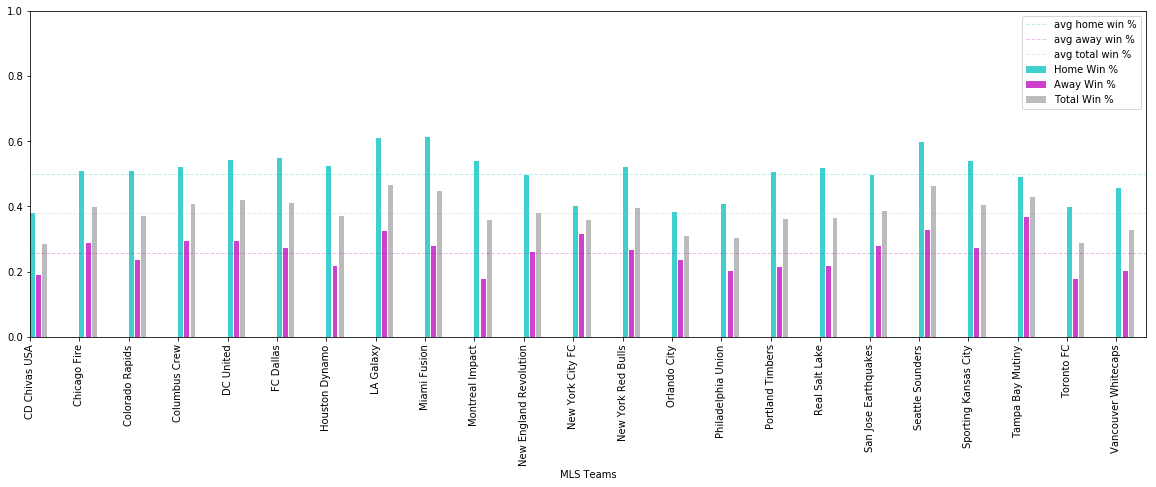

In [195]:
plt.figure(figsize=(20, 6))
win_ratio['Home Win %'].plot(kind='bar', ylim=(0, 1), color='c', width=.1, label='Home Win %', position=0, alpha=.75)
win_ratio['Away Win %'].plot(kind='bar', ylim=(0, 1), color='m', width=.1, label='Away Win %', position=-1.25, alpha=.75)
win_ratio['Total Win %'].plot(kind='bar', ylim=(0, 1), color='#a5a5a5', width=.1, label='Total Win %', position=-2.5, alpha=.75)
plt.axhline(win_ratio['Home Win %'].mean(), color='c', linestyle='dashed', linewidth=1, label='avg home win %', alpha=.25)
plt.axhline(win_ratio['Away Win %'].mean(), color='m', linestyle='dashed', linewidth=1, label='avg away win %', alpha=.25)
plt.axhline(win_ratio['Total Win %'].mean(), color='#a5a5a5', linestyle='dashed', linewidth=1, label='avg total win %', alpha=.25)
plt.xlabel('MLS Teams')
plt.legend()
plt.show()

<h3>Win Percentages</h3>

Based on the above graph, the trend of the LA Glaxy being the most consistent winners continues but they do not walk away with the largest home win percentage. That honor gets taken up by the Miami Fusion, who were disbanded in 2002. It makes you wonder if that number would have stayed that high if they would have stayed in the league.

When comparing percentages, the team that most interests me is the Montreal Impact. The Impact win 53% of their matches at home, good enough to be a 7th best. This is while having only a 17% away win percentage, which puts them at 2nd worst in that category. 

<h3>Does Location / Length of Travel Have an Effect on Win Percentages?</h3>

Seeing how Montreal seeming performs at a much higher level while at home versus away leads me to wonder if a team traveling all the way up to Canada puts them at a disadvantage. Major League Soccer is unique among global soccer leagues in how geographically spread out the teams are. The geographic area of the United State is much larger than any European country, bar Russia, can boast. This causes teams to have to travel a much farther distance than a team playing in a European league might. To see if that puts teams at a disadvantage, we will see if teams hosting a team from the opposite conference leads to a higher win percentage than their overall home win percentage.

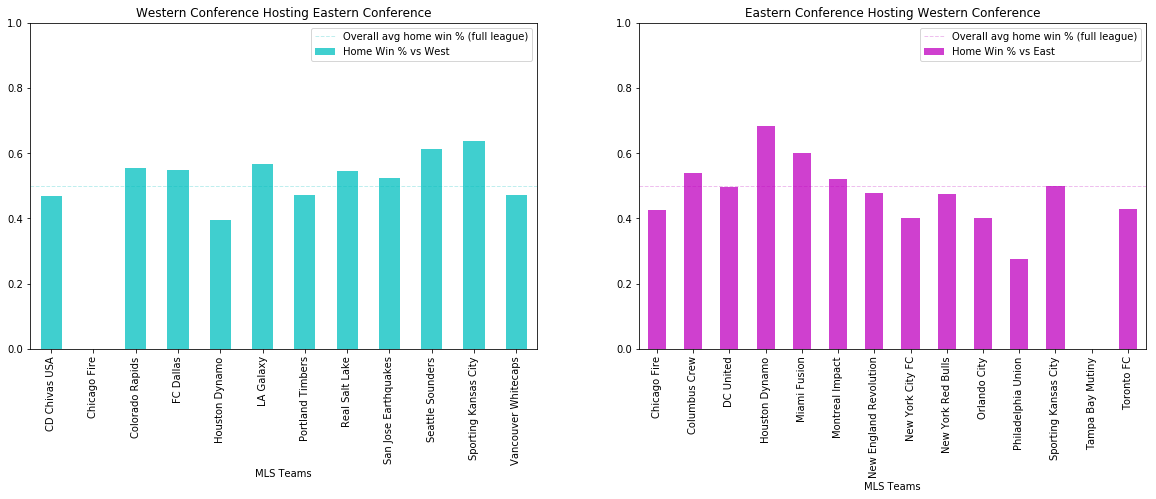

In [218]:
# Organize by conference
west_host_east = df.loc[(df['hconf'] == 'West') & (df['vconf']=='East')]
east_host_west = df.loc[(df['hconf'] == 'East') & (df['vconf']=='West')]

# West host wins / losses
west_host_east_home_wins = west_host_east.loc[west_host_east['hgoal'] > west_host_east['vgoal']]
west_host_east_away_wins = west_host_east.loc[west_host_east['vgoal'] > west_host_east['hgoal']]
west_host_east_ties = west_host_east.loc[west_host_east['vgoal'] == west_host_east['hgoal']]

# East host wins / losses
east_host_west_home_wins = east_host_west.loc[east_host_west['hgoal'] > east_host_west['vgoal']]
east_host_west_away_wins = east_host_west.loc[east_host_west['vgoal'] > east_host_west['hgoal']]
east_host_west_ties = east_host_west.loc[east_host_west['vgoal'] == east_host_west['hgoal']]

#Get the win percentages
west_host_east_per = west_host_east_home_wins.groupby('home').size() / (west_host_east_home_wins.groupby('home').size()+west_host_east_away_wins.groupby('home').size()+west_host_east_ties.groupby('home').size())
east_host_west_per = east_host_west_home_wins.groupby('home').size() / (east_host_west_home_wins.groupby('home').size()+east_host_west_away_wins.groupby('home').size()+east_host_west_ties.groupby('home').size())

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
west_host_east_per.plot(kind='bar', ylim=(0, 1), color='c', label='Home Win % vs West', alpha=.75)
plt.axhline(win_ratio['Home Win %'].mean(), color='c', linestyle='dashed', linewidth=1, label='Overall avg home win % (full league)', alpha=.25)
plt.title('Western Conference Hosting Eastern Conference')
plt.xlabel('MLS Teams')
plt.legend()
plt.subplot(1,2,2)
east_host_west_per.plot(kind='bar', ylim=(0, 1), color='m', label='Home Win % vs East', alpha=.75)
plt.axhline(win_ratio['Home Win %'].mean(), color='m', linestyle='dashed', linewidth=1, label='Overall avg home win % (full league)', alpha=.25)
plt.title('Eastern Conference Hosting Western Conference')
plt.xlabel('MLS Teams')
plt.legend()
plt.show()

print()

<h3>Location also does not seem to have a consistent effect on results</h3>

While some teams do seem to perform better against teams from the opposite conference, others have a drop in performance. Most notibly among those is the LA Galaxy which boasts a 60% win percentage at home when factoring in all matches, but falls below that mark at *56%* when only factoring games against the Eastern conference.

The other point of note is Sporting Kansas City, who both over perform their normal home game marks by nearly 10%.

A key issue with using this measurement is that over the years some teams have played in both conferences. Such as Sporting Kansas City and Houston Dynamo. In both their cases they currently play in the Western Conference. In the case of the Houston Dynamo, their record as an Eastern Conference team playing against Western Teams is much better than it is as a Western Conference team playing an Eastern Conference Team.

<h3>In Conclusion</h3>

There is a clear connection between the record of the home team being more likely to win a match. A home team is almost twice as likely to win a match than an away team is. This isn't affected in a clear way by how far the opponent has traveled. If given the opportunity, I would look at average attendance numbers for each team and see if that had any correlation to win percentages. I would also look into the home and away win percentages of leagues outside of MLS and see if the advantage of home field carries over to different coutries and leagues.